In [1]:
import numpy as np
import matplotlib.pyplot as plt

This program contains simulations of the following systems using leapfrog integration:

1. Spring mass problem

2. Two body problem

3. Three body problem



In [171]:
dt = 0.1
t_init = 0
t_finl = 200
t_steps = int((t_finl-t_init)/dt)+1
time = np.linspace(t_init,t_finl,t_steps)

In [257]:
def spring_force_calculator(x,v,params):
    force = -params[0]*x-params[1]*v
    return force

In [258]:
x_init = 1
v_init = 0
k_spring =1
drag_coeff = 0.5
mass   = 1
params = [mass, k_spring, drag_coeff]

def spring_leap_frog_integrator(time,x_init,v_init,params):
    x_t = np.zeros_like(time)+x_init
    v_t = np.zeros_like(time)+v_init
    a_t = np.zeros_like(time)+(1/params[0])*spring_force_calculator(x_t[0],v_t[0],params)
    v_t[0] = v_t[0]+(dt/2)*a_t[0]
    for i in range(t_steps-1):
        x_t[i+1]= x_t[i]+dt*v_t[i]
        a_t[i+1]  = 1/params[0]*spring_force_calculator(x_t[i+1],v_t[i],params)
        v_t[i+1]= v_t[i]+dt*a_t[i+1]
    return x_t,v_t,a_t

In [260]:
x_t,v_t,a_t = spring_leap_frog_integrator(time,x_init,v_init,params)


x: 0,    e,   2e, ...
v: e/2,1+e/2,...
a: 0,    e,   2e, ...

x(1)=x(0)+dt*v(0)
a(1)=-C*x(1)
v(1)=v(0)+dt*a(1)


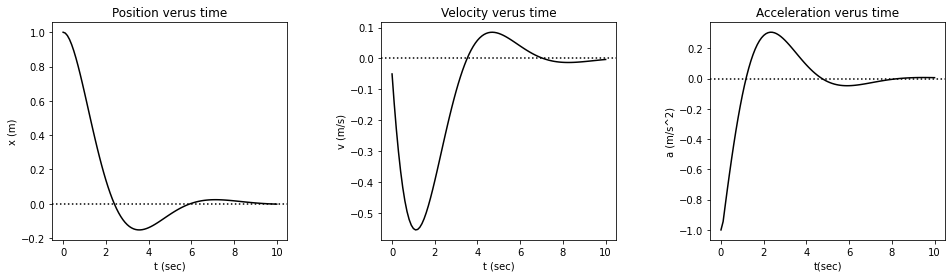

In [261]:
fig, ax =plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))

ax[0].plot(time,x_t,'k')
ax[0].set_xlabel('t (sec)')
ax[0].set_ylabel('x (m)')
ax[0].set_title('Position verus time')
ax[0].axhline(y=0.0, color='k', linestyle='dotted')
ax[1].plot(time,v_t,'k')
ax[1].set_xlabel('t (sec)')
ax[1].set_ylabel('v (m/s)')
ax[1].set_title('Velocity verus time')
ax[1].axhline(y=0.0, color='k', linestyle='dotted')
ax[2].plot(time,a_t,'k')
ax[2].set_xlabel('t(sec)')
ax[2].set_ylabel('a (m/s^2)')
ax[2].set_title('Acceleration verus time')
ax[2].axhline(y=0.0, color='k', linestyle='dotted')
plt.subplots_adjust(wspace=0.4)
plt.show()

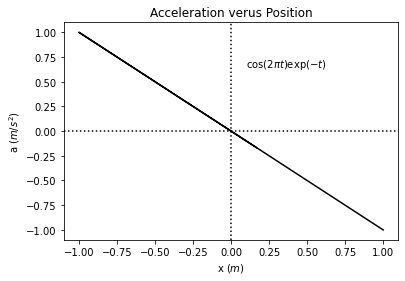

In [212]:
plt.plot(x_t,a_t,'k')
plt.xlabel('x $(m)$')
plt.ylabel('a $(m/s^2)$')
plt.title('Acceleration verus Position')
plt.text(0.1, 0.65, r'$\cos(2 \pi t) \exp(-t)$')
plt.axhline(y=0.0, color='k', linestyle='dotted')
plt.axvline(x=0.0, color='k', linestyle='dotted')
plt.show()

In [21]:
def two_body_gravity_force_calculator(q,params):
    r    = np.sqrt(q[0]**2+q[1]**2+q[2]**2)
    f   = -params[1]*params[0]*q/(r**3)
    return f

In [27]:
x_init  = 0.5
y_init  = 0
z_init  = 0
q_init  = [x_init,y_init,z_init]
vx_init = 0
vy_init = 1.63
vz_init = 0
v_init  = [vx_init,vy_init,vz_init]
GM      = 1
mass    = 1
params = [mass, GM]
def two_body_gravity_leap_frog_integrator(time,q_init,v_init,params):
    time_vec = np.transpose([time, time, time])
    q_t = np.zeros_like(time_vec)+q_init    #[time,dim]
    v_t = np.zeros_like(time_vec)+v_init
    a_t = np.zeros_like(time_vec)+(1/params[0])*two_body_gravity_force_calculator(q_t[0,:],params)
    v_t[0,:]  = v_t[0,:]+dt/2*np.asarray(a_t[0,:])
    for i in range(t_steps-1):
        q_t[i+1,:]= q_t[i,:]+dt*np.asarray(v_t[i,:])
        a_t[i+1]  = 1/params[0]*two_body_gravity_force_calculator(q_t[i+1,:],params)
        v_t[i+1,:] = v_t[i,:]+dt*np.asarray([a_t[i+1]])
    return q_t,v_t,a_t

In [28]:
q_t,v_t,a_t = two_body_gravity_leap_frog_integrator(time,q_init,v_init,params)

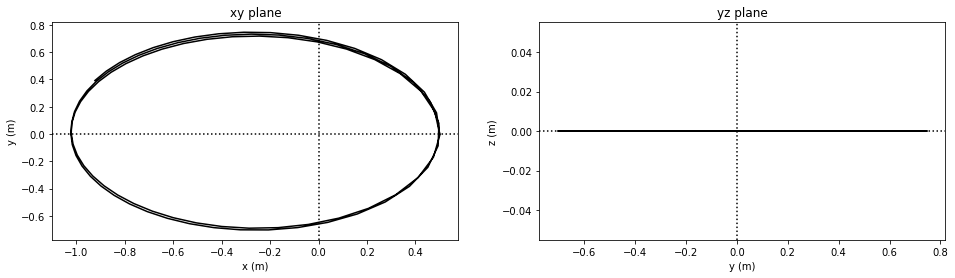

In [29]:
fig, ax =plt.subplots(nrows = 1, ncols = 2, figsize=(16,4))

ax[0].plot(q_t[:,0],q_t[:,1],'k')
ax[0].set_xlabel('x (m)')
ax[0].set_ylabel('y (m)')
ax[0].set_title('xy plane')
ax[0].axhline(y=0.0, color='k', linestyle='dotted')
ax[0].axvline(x=0.0, color='k', linestyle='dotted')
ax[1].plot(q_t[:,1],q_t[:,2],'k')
ax[1].set_xlabel('y (m)')
ax[1].set_ylabel('z (m)')
ax[1].set_title('yz plane')
ax[1].axhline(y=0.0, color='k', linestyle='dotted')
ax[1].axvline(x=0.0, color='k', linestyle='dotted')
plt.show()

In [172]:
def three_body_gravity_force_calculator(q1,q2,params):
    r10    = np.sqrt(q1[0]**2+q1[1]**2+q1[2]**2)
    r12    = np.sqrt((q1[0]-q2[0])**2+(q1[1]-q2[1])**2+(q1[2]-q2[2])**2)
    f10    = -params[3]*params[0]*params[1]*q1/(r10**3)
    f12    = -params[3]*params[2]*params[1]*(q1-q2)/(r12**3)
    f1     = f10+f12
    r20    = np.sqrt(q2[0]**2+q2[1]**2+q2[2]**2)
    f20    = -params[3]*params[0]*params[2]*q2/(r20**3)
    f21    = -f12
    f2     = f20 + f21
    return f1, f2

In [182]:
x1_init  = 0.5
y1_init  = 0
z1_init  = 0
q1_init  = [x1_init,y1_init,z1_init]
vx1_init = 0
vy1_init = 1.63
vz1_init = 0
v1_init  = [vx1_init,vy1_init,vz1_init]

x2_init  = -1.5
y2_init  = 0
z2_init  = 0
q2_init  = [x2_init,y2_init,z2_init]
vx2_init = 0
vy2_init = 0.8
vz2_init = 0
v2_init  = [vx2_init,vy2_init,vz2_init]

G_N      = 1
M_0      = 1
M_1      = 0.001
M_2      = 0.01 
params = [M_0,M_1,M_2,G_N]

In [183]:
def three_body_gravity_leap_frog_integrator(time,q1_init,q2_init,v1_init,v2_init,params):
    time_vec = np.transpose([time, time, time])
    q1_t  = np.zeros_like(time_vec)+q1_init    #[time,dim]
    v1_t  = np.zeros_like(time_vec)+v1_init
    q2_t  = np.zeros_like(time_vec)+q2_init    #[time,dim]
    v2_t  = np.zeros_like(time_vec)+v2_init
    f1_out,f2_out = three_body_gravity_force_calculator(q1_t[0,:],q2_t[0,:],params)
    a1_t  = np.zeros_like(time_vec)+(1/params[1])*f1_out
    a2_t  = np.zeros_like(time_vec)+(1/params[2])*f2_out
    v1_t[0,:]  = v1_t[0,:]+dt/2*np.asarray(a1_t[0,:])
    v2_t[0,:]  = v2_t[0,:]+dt/2*np.asarray(a2_t[0,:])

    for i in range(t_steps-1):
        q1_t[i+1,:]= q1_t[i,:]+dt*np.asarray(v1_t[i,:])
        q2_t[i+1,:]= q2_t[i,:]+dt*np.asarray(v2_t[i,:])
        f1_out,f2_out =three_body_gravity_force_calculator(q1_t[i+1,:],q2_t[i+1,:],params)
        a1_t[i+1]  = 1/params[1]*f1_out
        a2_t[i+1]  = 1/params[2]*f2_out
        v1_t[i+1,:] = v1_t[i,:]+dt*np.asarray([a1_t[i+1]])
        v2_t[i+1,:] = v2_t[i,:]+dt*np.asarray([a2_t[i+1]])

    return q1_t,v1_t,a1_t,q2_t,v2_t,a2_t

In [184]:
q1_t,v1_t,a1_t,q2_t,v2_t,a2_t = three_body_gravity_leap_frog_integrator(time,q1_init,q2_init,v1_init,v2_init,params)

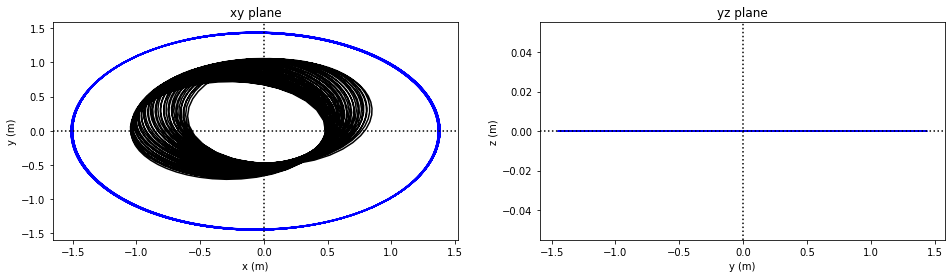

In [185]:
fig, ax =plt.subplots(nrows = 1, ncols = 2, figsize=(16,4))

ax[0].plot(q1_t[:,0],q1_t[:,1],'k')
ax[0].plot(q2_t[:,0],q2_t[:,1],'b')
ax[0].set_xlabel('x (m)')
ax[0].set_ylabel('y (m)')
ax[0].set_title('xy plane')
# ax[0].set_xlim([-2,2])
# ax[0].set_ylim([-2,2])
ax[0].axhline(y=0.0, color='k', linestyle='dotted')
ax[0].axvline(x=0.0, color='k', linestyle='dotted')
ax[1].plot(q1_t[:,1],q1_t[:,2],'k')
ax[1].plot(q2_t[:,1],q2_t[:,2],'b')
ax[1].set_xlabel('y (m)')
ax[1].set_ylabel('z (m)')
ax[1].set_title('yz plane')
ax[1].axhline(y=0.0, color='k', linestyle='dotted')
ax[1].axvline(x=0.0, color='k', linestyle='dotted')
plt.show()